In [1]:
#Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats imports
from scipy import stats

#Plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
flight_dframe = sns.load_dataset('flights') #again using an sns provided dataset

In [7]:
flight_dframe.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [8]:
flight_dframe = flight_dframe.pivot('month','year','passengers')
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


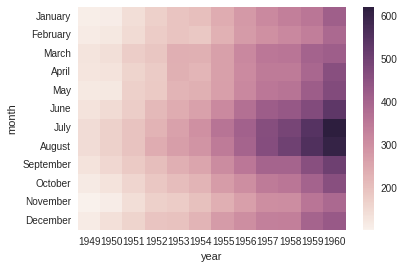

In [9]:
sns.heatmap(flight_dframe)

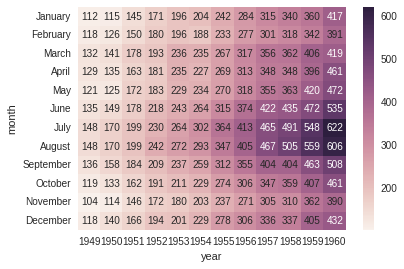

In [11]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

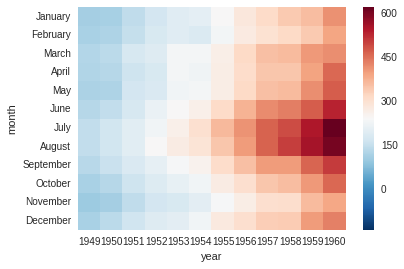

In [14]:
"""Colored scheme changed, instead of lowest light to highest dark,
we have now created Jan 1955 as center with a white, and the color tends to blue on lower side and red on higher side"""
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

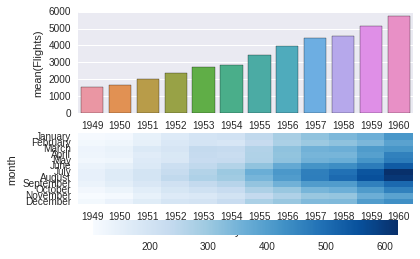

In [17]:
f,(axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()
years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues',ax=axis2, cbar_kws={'orientation':'horizontal'})

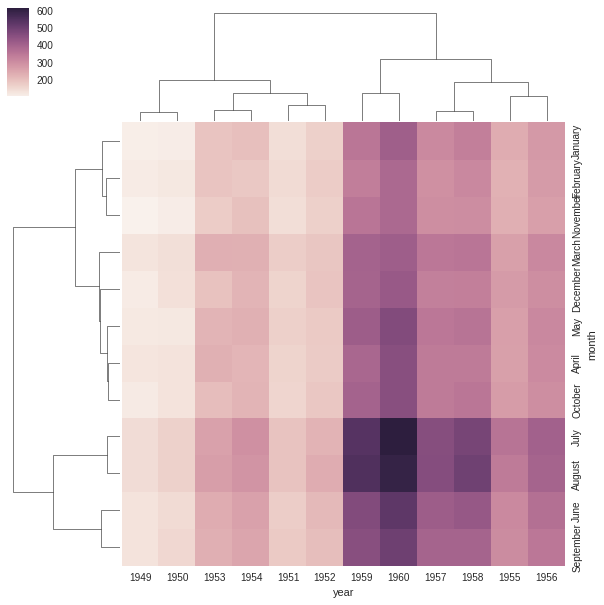

In [18]:
#Using Cluster Map - a map that reformats the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

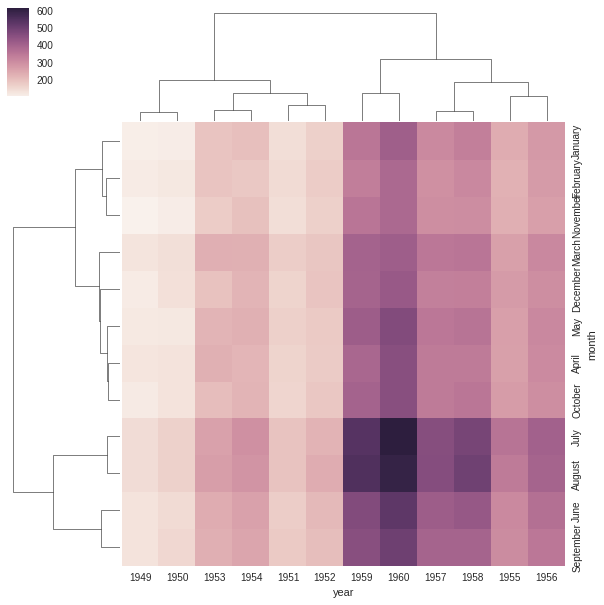

In [19]:
sns.clustermap(flight_dframe,col_cluster='False') #unclustered

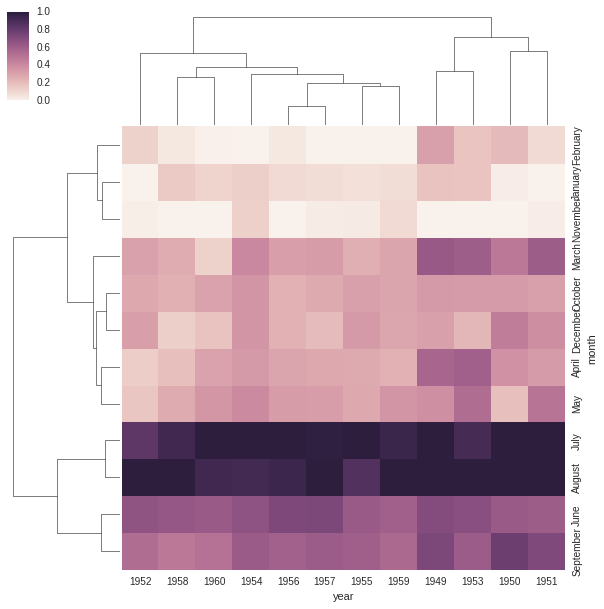

In [21]:
#Standardize the scale
sns.clustermap(flight_dframe,standard_scale=1) #means standardize by columns, i.e. year

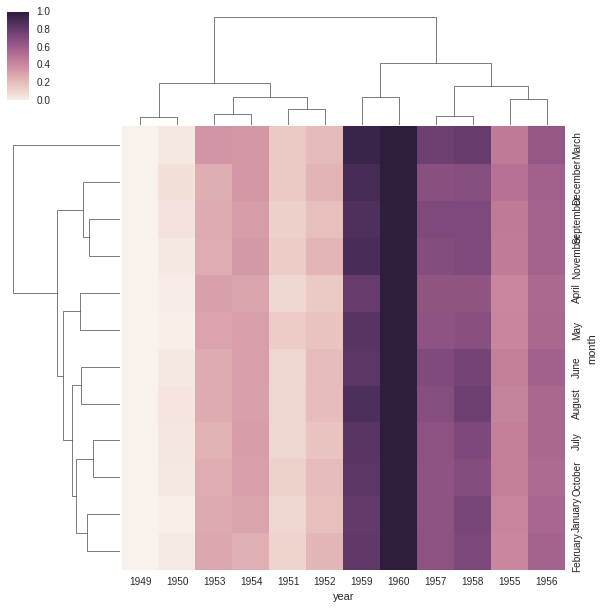

In [22]:
sns.clustermap(flight_dframe,standard_scale=0)

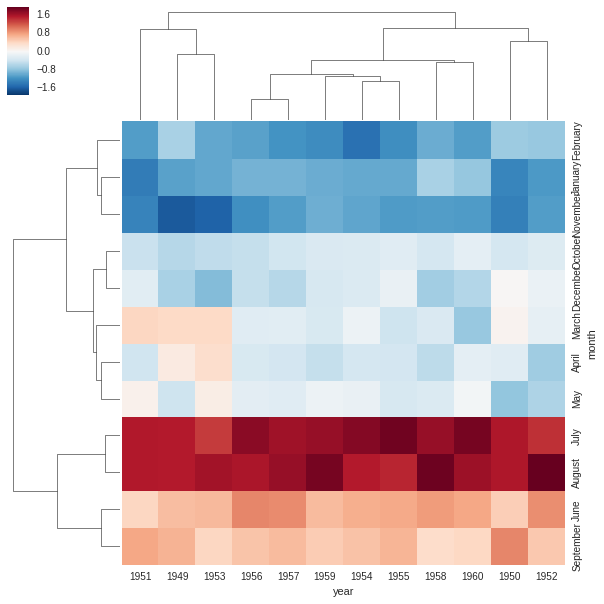

In [24]:
sns.clustermap(flight_dframe,z_score=1) #normalize by zscore. subtract mean and divide by stdev of each column